# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 57.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
# Income df
print(f"Shape: {df_hh_income.shape}")
print(f"Columns: {df_hh_income.columns}")
print(f"Is nan value?: {df_hh_income.isna().values.any()}")
print(f"Is duplicated values? {df_hh_income.duplicated().values.any()}")
print(df_hh_income.head(3))

Shape: (29322, 3)
Columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Is nan value?: True
Is duplicated values? False
  Geographic Area             City Median Income
0              AL       Abanda CDP         11207
1              AL   Abbeville city         25615
2              AL  Adamsville city         42575


In [6]:
# Povery percent df
print(f"Shape: {df_pct_poverty.shape}")
print(f"Columns: {df_pct_poverty.columns}")
print(f"Is nan value?: {df_pct_poverty.isna().values.any()}")
print(f"Is duplicated values? {df_pct_poverty.duplicated().values.any()}")
print(df_pct_poverty.head(3))

Shape: (29329, 3)
Columns: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Is nan value?: False
Is duplicated values? False
  Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5


In [7]:
# Education (high school) percent df
print(f"Shape: {df_pct_completed_hs.shape}")
print(f"Columns: {df_pct_completed_hs.columns}")
print(f"Is nan value?: {df_pct_completed_hs.isna().values.any()}")
print(f"Is duplicated values? {df_pct_completed_hs.duplicated().values.any()}")
print(df_pct_completed_hs.head(3))

Shape: (29329, 3)
Columns: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Is nan value?: False
Is duplicated values? False
  Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9


In [8]:
# Race share percent df
print(f"Shape: {df_share_race_city.shape}")
print(f"Columns: {df_share_race_city.columns}")
print(f"Is nan value?: {df_share_race_city.isna().values.any()}")
print(f"Is duplicated values? {df_share_race_city.duplicated().values.any()}")
print(df_share_race_city.head(3))

Shape: (29268, 7)
Columns: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Is nan value?: False
Is duplicated values? False
  Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3  


In [9]:
# fatalities  df
print(f"Shape: {df_fatalities.shape}")
print(f"Columns: {df_fatalities.columns}")
print(f"Is nan value?: {df_fatalities.isna().values.any()}")
print(f"Is duplicated values? {df_fatalities.duplicated().values.any()}")
print(df_fatalities.head(3))

Shape: (2535, 14)
Columns: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
Is nan value?: True
Is duplicated values? False
   id                name      date   manner_of_death    armed   age gender  \
0   3          Tim Elliot  02/01/15              shot      gun 53.00      M   
1   4    Lewis Lee Lembke  02/01/15              shot      gun 47.00      M   
2   5  John Paul Quintero  03/01/15  shot and Tasered  unarmed 23.00      M   

  race     city state  signs_of_mental_illness threat_level         flee  \
0    A  Shelton    WA                     True       attack  Not fleeing   
1    W    Aloha    OR                    False       attack  Not fleeing   
2    H  Wichita    KS                    False        other  Not fleeing   

   body_camera  
0        False  
1        False  
2        False  


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
# Income df
print(f"Where is nan value located: \n{df_hh_income.isna().sum()}")
print(f"nan values: {df_hh_income[df_hh_income.isna().values == True].head(2)}")
df_hh_income.fillna(0, inplace=True)
print(f"is nan value: \n{df_hh_income.isna().values.any()}")

Where is nan value located: 
Geographic Area     0
City                0
Median Income      51
dtype: int64
nan values:       Geographic Area        City Median Income
29119              WY  Albany CDP           NaN
29121              WY  Alcova CDP           NaN
is nan value: 
False


In [11]:
# fatalities  df
print(f"Where is nan value located: \n{df_fatalities.isna().sum()}")
print(f"nan values: {df_fatalities[df_fatalities.isna().values == True].head(2)}")
df_fatalities.fillna(0, inplace=True)
print(f"is nan value: \n{df_fatalities.isna().values.any()}")

Where is nan value located: 
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64
nan values:       id               name      date manner_of_death armed   age gender race  \
59   110   William Campbell  25/01/15            shot   gun 59.00      M  NaN   
124  584  Alejandro Salazar  20/02/15            shot   gun   NaN      M    H   

        city state  signs_of_mental_illness threat_level         flee  \
59   Winslow    NJ                    False       attack  Not fleeing   
124  Houston    TX                    False       attack          Car   

     body_camera  
59         False  
124       

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
print(df_pct_poverty.head(2))
df_pct_poverty.info()

  Geographic Area            City poverty_rate
0              AL      Abanda CDP         78.8
1              AL  Abbeville city         29.1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [13]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(str).str.replace("-", "0")
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)
df_pct_by_area = df_pct_poverty.groupby("Geographic Area").agg({"poverty_rate": pd.Series.mean})

In [14]:
df_pct_by_area.sort_values("poverty_rate", ascending=False, inplace=True)
df_pct_by_area.head(3)

,poverty_rate
Geographic Area,
MS,26.88
AZ,25.27
GA,23.66


In [15]:
plt.figure(figsize=(4, 8), dpi=250)
fig = px.bar(
    df_pct_by_area,
    x=df_pct_by_area.index,
    y="poverty_rate",
    color="poverty_rate",
    title="poverty rate from highest to lowest by US state"
)

fig.update_layout(
    yaxis_title="Percent",
    xaxis_title="States"
)
fig.show()

<Figure size 1000x2000 with 0 Axes>

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [16]:
print(df_pct_completed_hs.head(3))
df_pct_completed_hs.info()

  Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [17]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(str).str.replace("-", "0")

df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

In [18]:
df_pct_hs_state = df_pct_completed_hs.groupby("Geographic Area").agg({"percent_completed_hs": pd.Series.mean})
df_pct_hs_state.sort_values("percent_completed_hs", inplace=True)
df_pct_hs_state.head(3)

,percent_completed_hs
Geographic Area,
TX,74.09
MS,78.47
GA,78.63


In [19]:
plt.figure(figsize=(7, 4), dpi=150)

fig = px.bar(
    df_pct_hs_state,
    x=df_pct_hs_state.index,
    y="percent_completed_hs",
    color="percent_completed_hs",
    title="High School Graduation Rate in ascending order of US States"
)

fig.update_layout(
    yaxis_title="Percent",
    xaxis_title="States"
)

fig.show()

<Figure size 1050x600 with 0 Axes>

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the ratios of poverty and high school graduation move together.  

In [20]:
print(df_pct_by_area.head(3))
print(df_pct_hs_state.head(3))

                 poverty_rate
Geographic Area              
MS                      26.88
AZ                      25.27
GA                      23.66
                 percent_completed_hs
Geographic Area                      
TX                              74.09
MS                              78.47
GA                              78.63


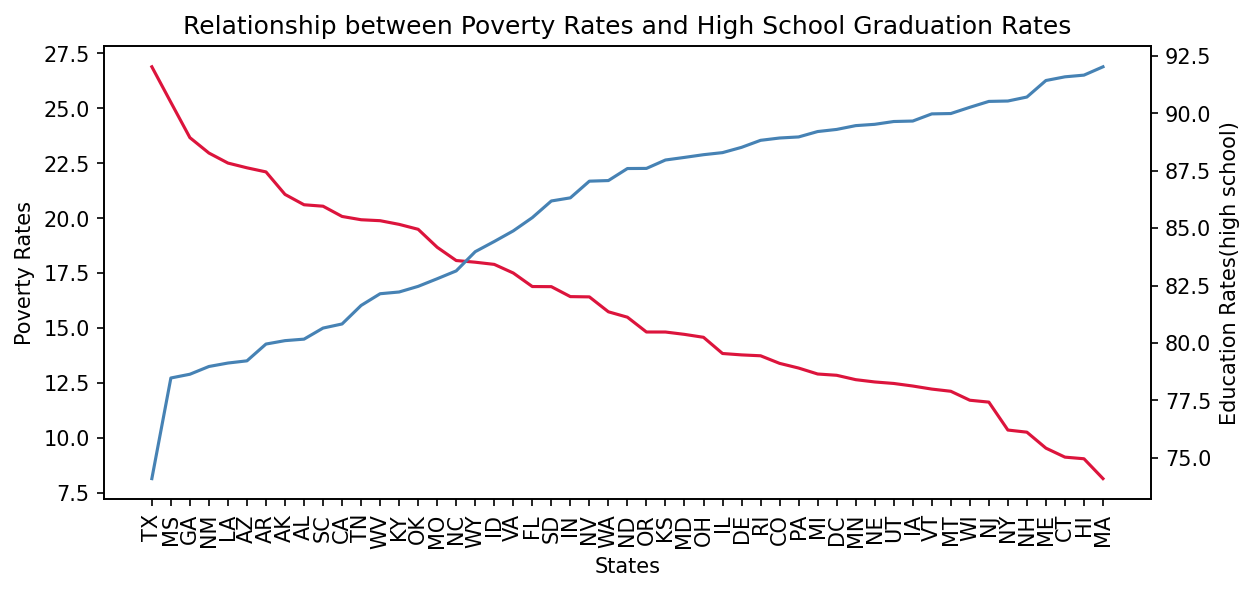

In [21]:
plt.figure(figsize=(9, 4), dpi=150)

plt.xticks(rotation=90)
plt.title("Relationship between Poverty Rates and High School Graduation Rates")

axis1 = plt.gca()
axis2 = axis1.twinx()

axis1.plot(
    df_pct_by_area.index,
    df_pct_by_area.poverty_rate,
    color="crimson",
)

axis1.set_xlabel("States")
axis1.set_ylabel("Poverty Rates")

axis2.plot(
    df_pct_hs_state.index,
    df_pct_hs_state.percent_completed_hs,
    color="steelblue",
)

axis2.set_ylabel("Education Rates(high school)")

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

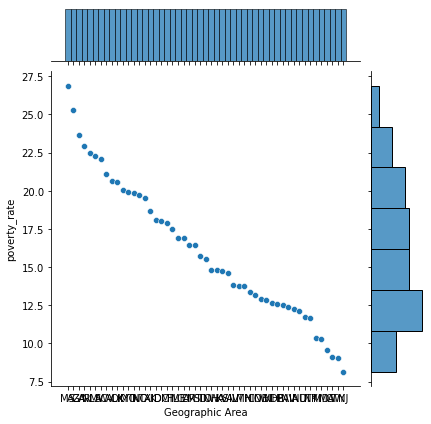

In [22]:
sns.jointplot(data=df_pct_by_area, 
              x=df_pct_by_area.index,
              y="poverty_rate")

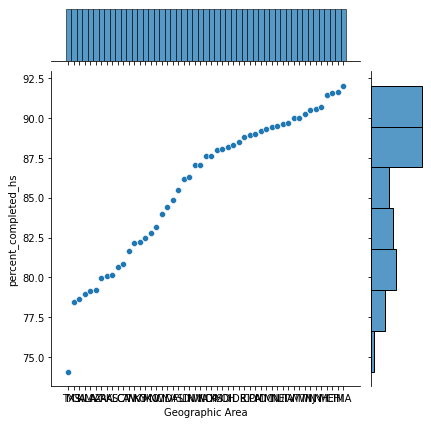

In [23]:
sns.jointplot(
    data=df_pct_hs_state,
    x=df_pct_hs_state.index,
    y="percent_completed_hs",
)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [26]:
print(df_pct_by_area.head(3))
df_pct_hs_state.head(3)

                 poverty_rate
Geographic Area              
MS                      26.88
AZ                      25.27
GA                      23.66


,percent_completed_hs
Geographic Area,
TX,74.09
MS,78.47
GA,78.63


In [27]:
df_pct_poverty_edu = pd.merge(df_pct_by_area, df_pct_hs_state, on="Geographic Area")
df_pct_poverty_edu.head(3)

,poverty_rate,percent_completed_hs
Geographic Area,,
MS,26.88,78.47
AZ,25.27,79.22
GA,23.66,78.63


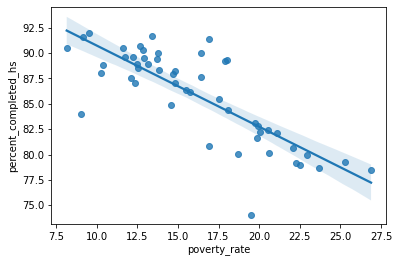

In [28]:
sns.regplot(
    data=df_pct_poverty_edu,
    x="poverty_rate",
    y="percent_completed_hs"
)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [29]:
df_share_race_city.head(3)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3


In [31]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [39]:
df_share_race_city.loc[630]

Geographic area                   AK
City                     Chisana CDP
share_white                      (0)
share_black                      (X)
share_native_american            (X)
share_asian                      (X)
share_hispanic                   (X)
Name: 630, dtype: object

In [40]:
races = ["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]
for race in races:
    df_share_race_city[race] = df_share_race_city[race].astype(str).str.replace("(X)", "0").replace("(0)", "0")
    df_share_race_city[race] = pd.to_numeric(df_share_race_city[race])
df_share_race_city.info()

<ipython-input-40-78eef50e2569>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [45]:
race_by_state_df = df_share_race_city.groupby("Geographic area", as_index=False).mean()

In [50]:
plt.figure(figsize=(8, 4), dpi=150)

fig = px.bar(
    race_by_state_df,
    x="Geographic area",
    y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]
)

fig.update_layout(
    title="Racial Makeup of Each US State",
    yaxis_title="Percent",
    xaxis_title="States"
)
fig.show()

<Figure size 1200x600 with 0 Axes>

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [55]:
print(df_fatalities.head(3))
p_race_k = df_fatalities.value_counts("race")

   id                name      date   manner_of_death    armed   age gender  \
0   3          Tim Elliot  02/01/15              shot      gun 53.00      M   
1   4    Lewis Lee Lembke  02/01/15              shot      gun 47.00      M   
2   5  John Paul Quintero  03/01/15  shot and Tasered  unarmed 23.00      M   

  race     city state  signs_of_mental_illness threat_level         flee  \
0    A  Shelton    WA                     True       attack  Not fleeing   
1    W    Aloha    OR                    False       attack  Not fleeing   
2    H  Wichita    KS                    False        other  Not fleeing   

   body_camera  
0        False  
1        False  
2        False  


In [56]:
p_race_k

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
dtype: int64

In [63]:
fig = px.pie(
    values=p_race_k.values,
    labels=["white", "black", "hispanic", "unknown", "asian", "native_american", "other"],
    names=["white", "black", "hispanic", "unknown", "asian", "native_american", "other"],
    title="Donut Chart by of People Killed by Race",
    hole=0.6,
)
fig.update_traces(
    textinfo="percent+label"
)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [65]:
death_by_gender = df_fatalities.value_counts("gender")

In [69]:
fig = px.pie(
    values=death_by_gender.values,
    labels=death_by_gender.index,
    names=["Males", "Females"],
    title="Total Number of Deaths of Men and Women",
    hole=0.4,
)

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [74]:
gender_manner_fatality = df_fatalities.groupby(["gender", "manner_of_death"], as_index=False).agg({"name": pd.Series.count})
gender_manner_fatality.rename(columns={"name": "number"}, inplace=True)
gender_manner_fatality.head() 

,gender,manner_of_death,number
0,F,shot,102
1,F,shot and Tasered,5
2,M,shot,2261
3,M,shot and Tasered,167


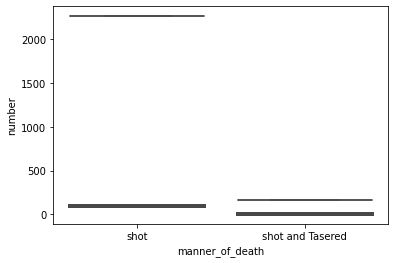

In [92]:
# Female manner of death
sns.boxplot(
    data=gender_manner_fatality[gender_manner_fatality.gender == "F"],
    x="manner_of_death",
    y="number",
    color="crimson",
    linewidth=4,
)

# male manner of death
sns.boxplot(
    data=gender_manner_fatality[gender_manner_fatality.gender == "M"],
    x="manner_of_death",
    y="number",
    color="blue",
)


# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [94]:
arms_during_fatalities = df_fatalities.armed.value_counts()

In [103]:
total_fatalities = arms_during_fatalities.sum()
unarmed = int(arms_during_fatalities[arms_during_fatalities.index == "unarmed"])
armed_pct_killed = (total_fatalities - unarmed) / total_fatalities * 100
armed_pct_killed

93.25443786982248

In [115]:
plt.figure(figsize=(10,4), dpi=200)

fig = px.bar(
    arms_during_fatalities,
    x=arms_during_fatalities.index,
    y=arms_during_fatalities.values,
    log_y=True,
)
fig.update_layout(
    title="Weapons on deceased during at the time of kill",
    xaxis_title="Weapons",
    yaxis_title="Number of deceased",  
)
fig.show()

<Figure size 2000x800 with 0 Axes>

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [121]:
total_fatalities = len(df_fatalities)
under_25_kill = len(df_fatalities[df_fatalities.age < 25])
under_25_kill / total_fatalities * 100

20.78895463510848

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [122]:
fatalities_by_age = df_fatalities.groupby("age").count()
fatalities_by_age.head()

,id,name,date,manner_of_death,armed,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
age,,,,,,,,,,,,,
0.00,77,77,77,77,77,77,77,77,77,77,77,77,77
6.00,1,1,1,1,1,1,1,1,1,1,1,1,1
12.00,1,1,1,1,1,1,1,1,1,1,1,1,1
13.00,1,1,1,1,1,1,1,1,1,1,1,1,1
14.00,1,1,1,1,1,1,1,1,1,1,1,1,1


Create a seperate KDE plot for each race. Is there a difference between the distributions? 

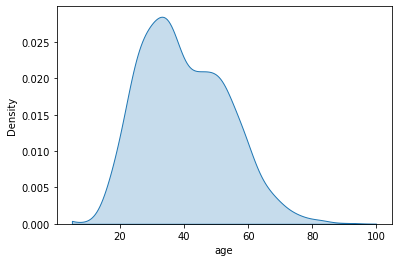

In [143]:
# White
sns.kdeplot(
    data=df_fatalities[df_fatalities.race == "W"],
    x="age",
    legend=True,
    shade=True,
    clip=(5, 100),
)

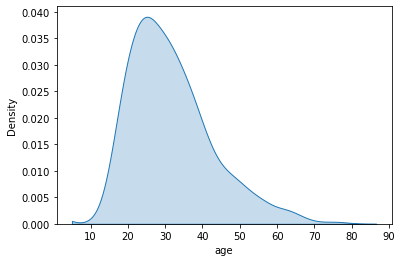

In [142]:
# Black
sns.kdeplot(
    data=df_fatalities[df_fatalities.race == "B"],
    x="age",
    shade=True,
    clip=(5, 100),
)


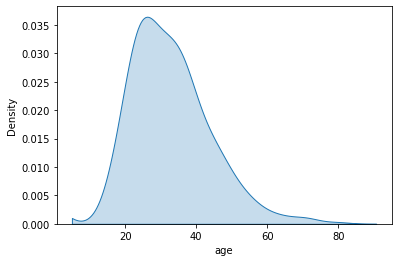

In [144]:
# Hispanic
sns.kdeplot(
    data=df_fatalities[df_fatalities.race == "H"],
    x="age",
    shade=True,
    clip=(5, 100),
)


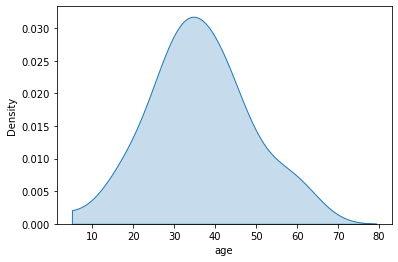

In [145]:
# Asian
sns.kdeplot(
    data=df_fatalities[df_fatalities.race == "A"],
    x="age",
    shade=True,
    clip=(5, 100),
)

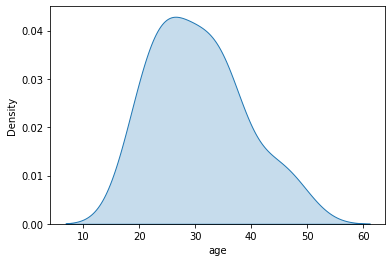

In [146]:
# Native American
sns.kdeplot(
    data=df_fatalities[df_fatalities.race == "N"],
    x="age",
    shade=True,
    clip=(5, 100),
)

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [147]:
p_race_k

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
dtype: int64

In [150]:
plt.figure(figsize=(8, 4), dpi=150)

fig = px.bar(
    x=p_race_k.index,
    y=p_race_k.values,
    color=p_race_k.index
)

fig.update_layout(
    title="Race of People Killed",
    xaxis_title="Race",
    yaxis_title="Number"
)

fig.show()

<Figure size 1200x600 with 0 Axes>

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [152]:
df_fatalities.value_counts("signs_of_mental_illness")

signs_of_mental_illness
False    1902
True      633
dtype: int64

In [155]:
len(df_fatalities[df_fatalities.signs_of_mental_illness == True]) / len(df_fatalities) * 100

24.970414201183434

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [174]:
fatality_city = df_fatalities.groupby("city").count().sort_values("state", ascending=False)[:10]

In [164]:
plt.figure(figsize=(8, 4), dpi=150)

fig = px.bar(
    fatality_city,
    x=fatality_city.index,
    y=fatality_city.state
)

fig.update_layout(
    title="Cities with most police killings",
    xaxis_title="Cities",
    yaxis_title="Number"
)
fig.show()

<Figure size 1200x600 with 0 Axes>

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [177]:
df_share_race_city[df_share_race_city.City == "Los Angeles city"]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
2714,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50


In [198]:
g_city = df_share_race_city.groupby("City", as_index=False).mean()
top_fatality_city_race = {}
for ind, city in enumerate(fatality_city.index):
    temp = g_city[g_city.City == city + " city"]
    top_fatality_city_race[city] = {"share_white": temp.share_white.values[0], 
                                   "share_black": temp.share_black.values[0], 
                                   "share_native_american": temp.share_native_american.values[0], 
                                   "share_asian": temp.share_asian.values[0], 
                                   "share_hispanic": temp.share_hispanic.values[0]}


In [199]:
top_fatality_city_race = pd.DataFrame(top_fatality_city_race)
top_fatality_city_race.head()

,Los Angeles,Phoenix,Houston,Chicago,Las Vegas,San Antonio,Columbus,Miami,Austin,St. Louis
share_white,49.80,74.95,75.90,45.00,63.50,84.55,76.56,83.33,86.60,55.80
share_black,9.60,3.70,13.14,32.90,6.50,4.00,15.77,5.33,3.35,39.15
share_native_american,0.70,1.85,1.70,0.50,1.40,0.45,0.62,4.48,0.45,0.45
share_asian,11.30,2.25,1.54,5.50,3.50,1.40,1.85,0.42,2.33,1.55
share_hispanic,48.50,28.30,11.12,28.90,56.00,34.65,6.24,21.10,14.23,4.60


In [201]:
plt.figure(figsize=(8, 4), dpi=150)

px.bar(
    top_fatality_city_race,
    y=top_fatality_city_race.columns,
    x=top_fatality_city_race.index,
)

<Figure size 1200x600 with 0 Axes>

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [202]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [206]:
fatal_state  = df_fatalities.groupby("state").agg({"name": pd.Series.count})
fatal_state.head()

,name
state,
AK,15
AL,50
AR,26
AZ,118
CA,424


In [220]:
fig = px.choropleth(
    fatal_state,
    locations=fatal_state.index,
    color=fatal_state.name,
    locationmode="USA-states",
    scope="usa",
)

fig.update_layout(
    title="Fatalities by states"
)

fig.show()

In [224]:
fig = px.choropleth(
    df_pct_by_area,
    locations=df_pct_by_area.index,
    color=df_pct_by_area.poverty_rate,
    locationmode="USA-states",
    scope="usa",
)

fig.update_layout(
    title="Fatalities by states"
)

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [227]:

df_fatalities.date = pd.to_datetime(df_fatalities.date)
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2535 non-null   object        
 5   age                      2535 non-null   float64       
 6   gender                   2535 non-null   object        
 7   race                     2535 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2535 non-

In [229]:
df_fatalities.sort_values("date", inplace=True)

In [230]:
df_fatalities.date = df_fatalities.date.dt.month

In [233]:
killing_over_month = df_fatalities.groupby("date").agg({"name": pd.Series.count})

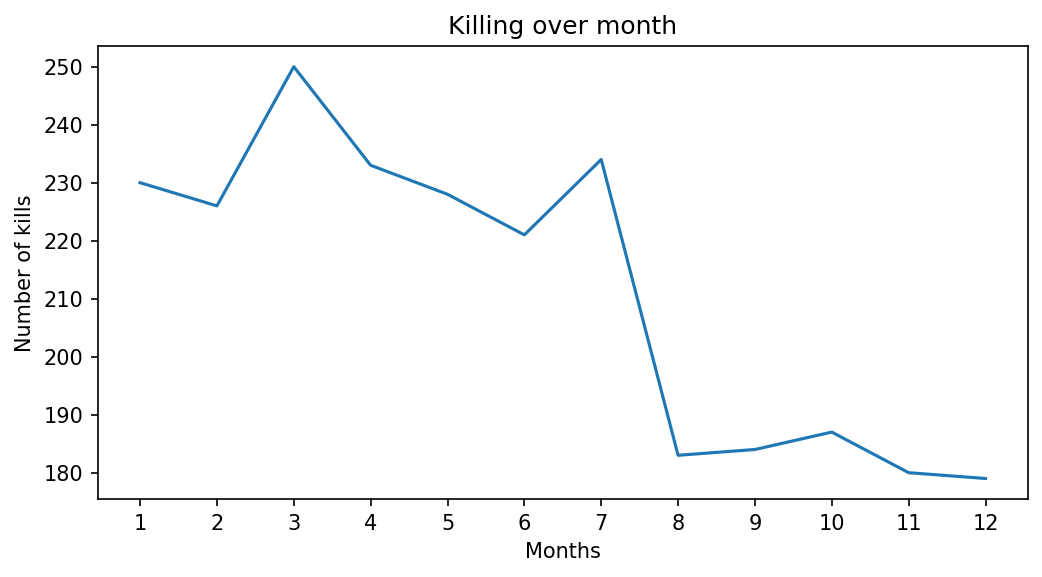

In [238]:
plt.figure(figsize=(8, 4), dpi=150)

plt.plot(
    killing_over_month.index, 
    killing_over_month.name
)

plt.title("Killing over month")
plt.xlabel("Months")
plt.ylabel("Number of kills")
plt.xticks(np.arange(1, 13, 1))

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).